# Insight From Simple Applied Neural Network to MNIST Data 

In [1]:
import numpy as np
import tensorflow as tf

Creating simple data to learn with neural network

In [2]:
X = np.array([-20, -5, 1, 5, 20, 55, 76], dtype=float)
y = np.array([-10, 35, 53, 65, 110, 215, 278], dtype=float)

Simple NN with 1 layer. We will create 2 model that has the same function but different way to code

In [3]:
layer_1 = tf.keras.layers.Dense(1, input_shape=[1])

model = tf.keras.Sequential([layer_1])

In [4]:
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1, input_shape = [1])
])

Then we compile the model and fit the data

In [5]:
learning_rate = 0.1
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(learning_rate))

In [6]:
history = model.fit(X, y, epochs=1000, verbose=False)

Lets visualize our mean squared error value for each epochs

In [40]:
import matplotlib.pyplot as plt


def visualize(model, value = 'loss'):
  fig = plt.figure(figsize=(12,8))
  plt.xlabel('Epochs')
  plt.ylabel(value)
  plt.plot(model.history[value])
  plt.show()
  return

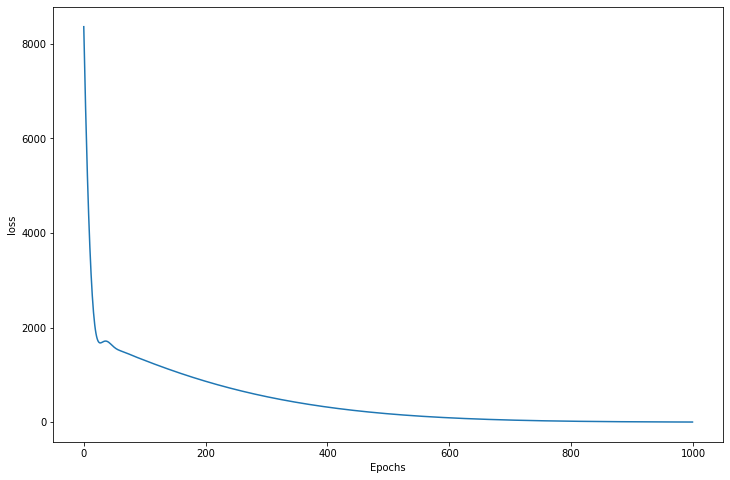

In [8]:
visualize(history)

You can see that as our epochs increasing the value of MSE decrease. But the rate of decrease is lower for each increasing epochs that the gradient of the slope is almost 0. Then we can look at the weight and bias the model has created.

In [9]:
model.get_weights()

[array([[3.0293145]], dtype=float32), array([47.871586], dtype=float32)]

The model we created is good. The real function of the data is 3x + 50 and our model weight and bias almost get the same result as the real function.

The model we created before is simple.
The model has 1 neuron and we declare it as N_1, the input data is X1. Because we only have 1 layer, N_1 is the same as output. so N_1 = y.

For more detail I recommend check Andrew NG Deeplearning in Coursera or The complete machine learning course with python in udemy by codestars.


```
N_1 = X1 * W1 + b1


What happen if we have 3 input X1, X2, X3 then we have 1 hidden layer and 1 output layer?

We can define that the model has 3 layers, input, hidden, and output.

```
Input Layer : X1, X2, X3
Hidden Layer : N_1
Output Layer : N_2
```
Then we have function like this. Note: No activation in the model yet

```
N_1 = X1 * W11 + X2 * W12 + X3 * W13 + b1
N_2 = N_1 * W21 + b2
```
Deeplearning is fun to learn <3

## Lets Make Neural Network Model with MNIST Data




In [10]:
mnist = tf.keras.datasets.mnist

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


MNIST Data has 60000 training data and 10000 testing data. Each data is an image with dimension 28x28. We will look at one of the data below

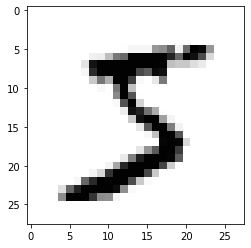

In [13]:
plt.imshow(X_train[0], cmap='Greys');

In [14]:
print(y_train[0])

5


In [15]:
X_train, X_test = X_train / 255, X_test / 255

Model 1

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

Flatten reshape the dimension of the image to 1 dimension. The activation take the value of that neuron to another function. For example relu is the simple model.

In [17]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In dense_4 layer,

we can say that dense_4 = max(0,sigma 1>i(N_i * Wi + b). The value of N_1 is equal to that value if value is bigger than 0, else the value become 0.
You can search it on google for more detail.

Note: I run this on GPU

In [18]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 256)

Epoch 1/25
235/235 [==============================] - 1s 3ms/step - loss: 0.3137 - accuracy: 0.9109
Epoch 2/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9626
Epoch 3/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9746
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9821
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9864
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9895
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9921
Epoch 8/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9936
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9952
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0138 - accuracy: 0.9965

The model actualy get the 99.99% of accuracy in epochs 23. Later we will use some method that makes the model stop early if we got the targeted number. Lets visualize the model accuracy below

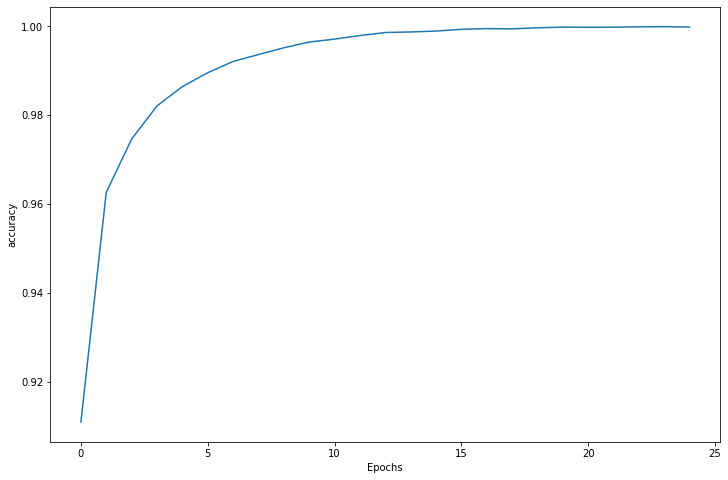

In [19]:
visualize(history, value = 'accuracy')

Lets see the test result

In [20]:
def eval_model(model, X_test=X_test, y_test=y_test):
  eval_loss, eval_acc = model.evaluate(X_test, y_test)
  print("Test Result\t:\n")
  print("Eval Accuracy\t: {0:.2f}%".format(eval_acc*100))
  print("Eval loss\t: {0:.4f}".format(eval_loss))

In [21]:
eval_model(model)

313/313 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9837
Test Result	:

Eval Accuracy	: 98.37%
Eval loss	: 0.0879


Model 2

In [33]:
model2 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model2.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 256)

Epoch 1/25
235/235 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.9047
Epoch 2/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1479 - accuracy: 0.9571
Epoch 3/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1040 - accuracy: 0.9702
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9770
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9811
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0518 - accuracy: 0.9845
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9869
Epoch 8/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9897
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9910
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.9919

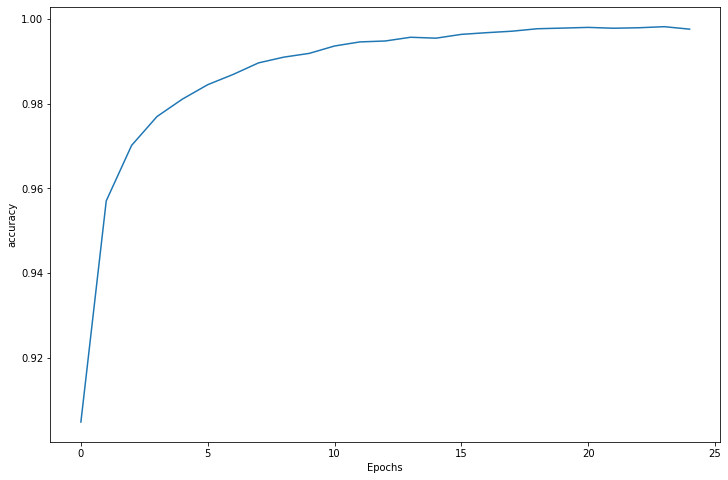

In [35]:
visualize(history, 'accuracy')

In [36]:
eval_model(model2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9833
Test Result	:

Eval Accuracy	: 98.33%
Eval loss	: 0.0608


If you look at the both model. Model1 have greater accuracy but if you compare the different value between training and test in model2 actually smaller than the model1. Because we put dropout in the model. You can search it for more detail. But dropout prevent overfit by deleting some neuron. So the different between training and testing of the model is smaller than the model without dropout that can makes overfit to the training data.

### Neural Network with Validation Data

In [37]:
model2 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model2.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 256,
                    validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.3446 - accuracy: 0.9021 - val_loss: 0.1660 - val_accuracy: 0.9508
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1480 - accuracy: 0.9573 - val_loss: 0.1145 - val_accuracy: 0.9666
Epoch 3/25
235/235 [========

In [45]:
def visualize_train_test(model, value = 'loss'):
  value2 = "val_" + str(value)
  fig = plt.figure(figsize=(12,8))
  plt.xlabel('Epochs')
  plt.ylabel(value)
  plt.plot(model.history[value], label='training', c='red')
  plt.plot(model.history["val_"+value], label='validation', c='blue')
  plt.legend()
  plt.show()
  return

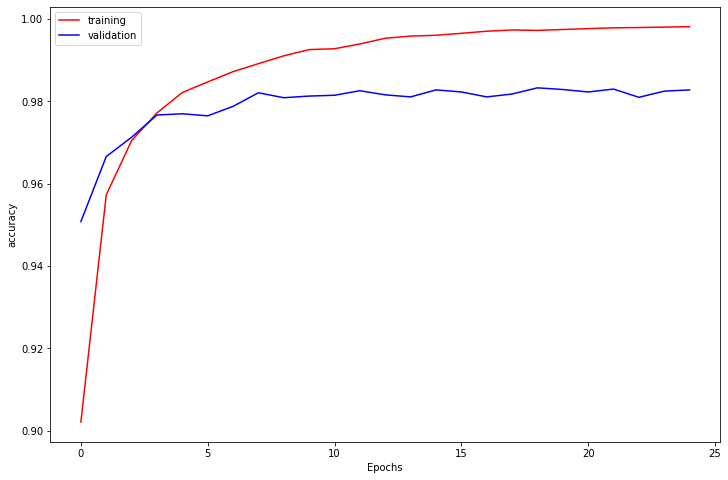

In [46]:
visualize_train_test(history, 'accuracy')

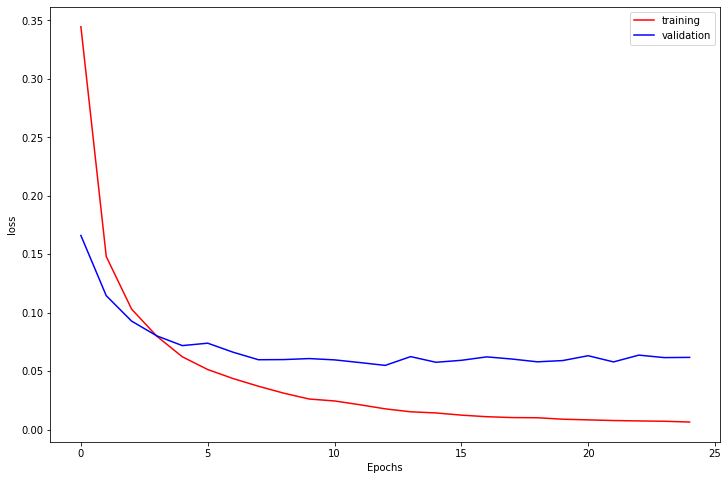

In [47]:
visualize_train_test(history, 'loss')

From the image above, the model actually start to overfit at epochs number 4 as the training data loss is decreasing but the testing loss is start to flat. If this happen we can try to regulerize our model. But before that you need to watch the accuracy of the model. For example if our first accuracy target is above 95%. Then from the model above we can start to use regulerized model to get the better result for the testing data.

If the training data accuracy before applied regulerized not reaching the targeted accuracy. Its better to change the model to get higher training accuracy first. We want to get as high as you can in training data. Then applying regulerized model to increase the testing data.